In [160]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error

In [161]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1=df.reset_index()['Open']

In [162]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [163]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [164]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [165]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [166]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [167]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [168]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 3s 48ms/step - loss: 0.0484 - val_loss: 0.0291
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0041 - val_loss: 0.0074
Epoch 3/100
14/14 [==============================] - 0s 32ms/step - loss: 0.0022 - val_loss: 0.0092
Epoch 4/100
14/14 [==============================] - 0s 28ms/step - loss: 0.0019 - val_loss: 0.0073
Epoch 5/100
14/14 [==============================] - 0s 29ms/step - loss: 0.0017 - val_loss: 0.0066
Epoch 6/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 7/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 8/100
14/14 [==============================] - 0s 29ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 9/100
14/14 [==============================] - 0s 29ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 10/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0013 - val_loss: 0.0050

In [169]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 6ms/step


In [170]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [172]:
# 12. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=80
i=0
while(i<30):
    
    if(len(temp_input)>80):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.51658267]
81
1 day input [0.32722672 0.31644586 0.2976366  0.29580157 0.30360055 0.28379733
 0.28953184 0.28081538 0.28639701 0.26758781 0.27775697 0.29648975
 0.28784971 0.28433254 0.28494424 0.27722174 0.25657751 0.28609116
 0.28142708 0.3007715  0.33166143 0.32110994 0.31904548 0.33670777
 0.33655487 0.31851027 0.32615629 0.31881612 0.32325081 0.34511844
 0.34978252 0.35085295 0.35429364 0.36316305 0.3390016  0.34060726
 0.33938392 0.33632551 0.32523874 0.34909435 0.35742854 0.36346884
 0.34534781 0.36025753 0.37990779 0.39183563 0.37080907 0.37180303
 0.39565864 0.39237084 0.37111486 0.34450674 0.36186318 0.36415701
 0.36591557 0.37180303 0.3751673  0.39519983 0.41760268 0.42624272
 0.41852022 0.41775563 0.44711631 0.46087917 0.47211884 0.46149082
 0.44237577 0.45063348 0.46042037 0.45590925 0.50430857 0.49727419
 0.49146325 0.52380589 0.51187812 0.52495281 0.5397861  0.50920202
 0.51738326 0.51658267]
1 day output [[0.5191156]]
2 day input [0.31644586 0.2976366  0.29580157 0.30

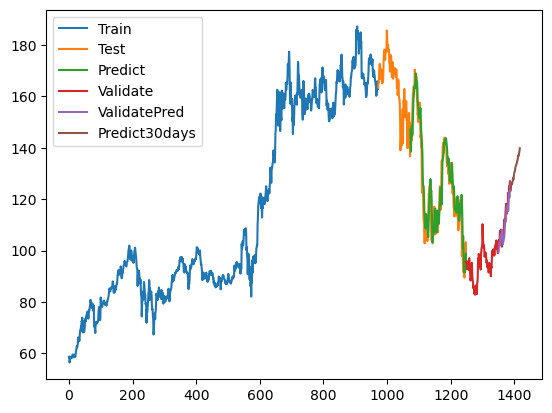

In [173]:
# 13.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [174]:
train_data= scaler.inverse_transform(train_data)
test_data= scaler.inverse_transform(test_data)
val_data= scaler.inverse_transform(val_data)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# 14. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 10.859979439844206
Testing RMSE: 26.636775208704915


In [175]:
#Tính MAE
val_mae= mean_absolute_error(yval, y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)

print('Validation MAE:', val_mae)
print('Testing MAE:', test_mae)

Validation MAE: 2.1401537728240188
Testing MAE: 3.84027775995428
